In [49]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
clf=pd.read_csv("forestfires.csv")
clf.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [52]:
clf.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


C:\Users\Aditya\AppData\Local\Temp\ipykernel_84252\4175281987.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  clf.hist(ax=a1, bins=18)


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

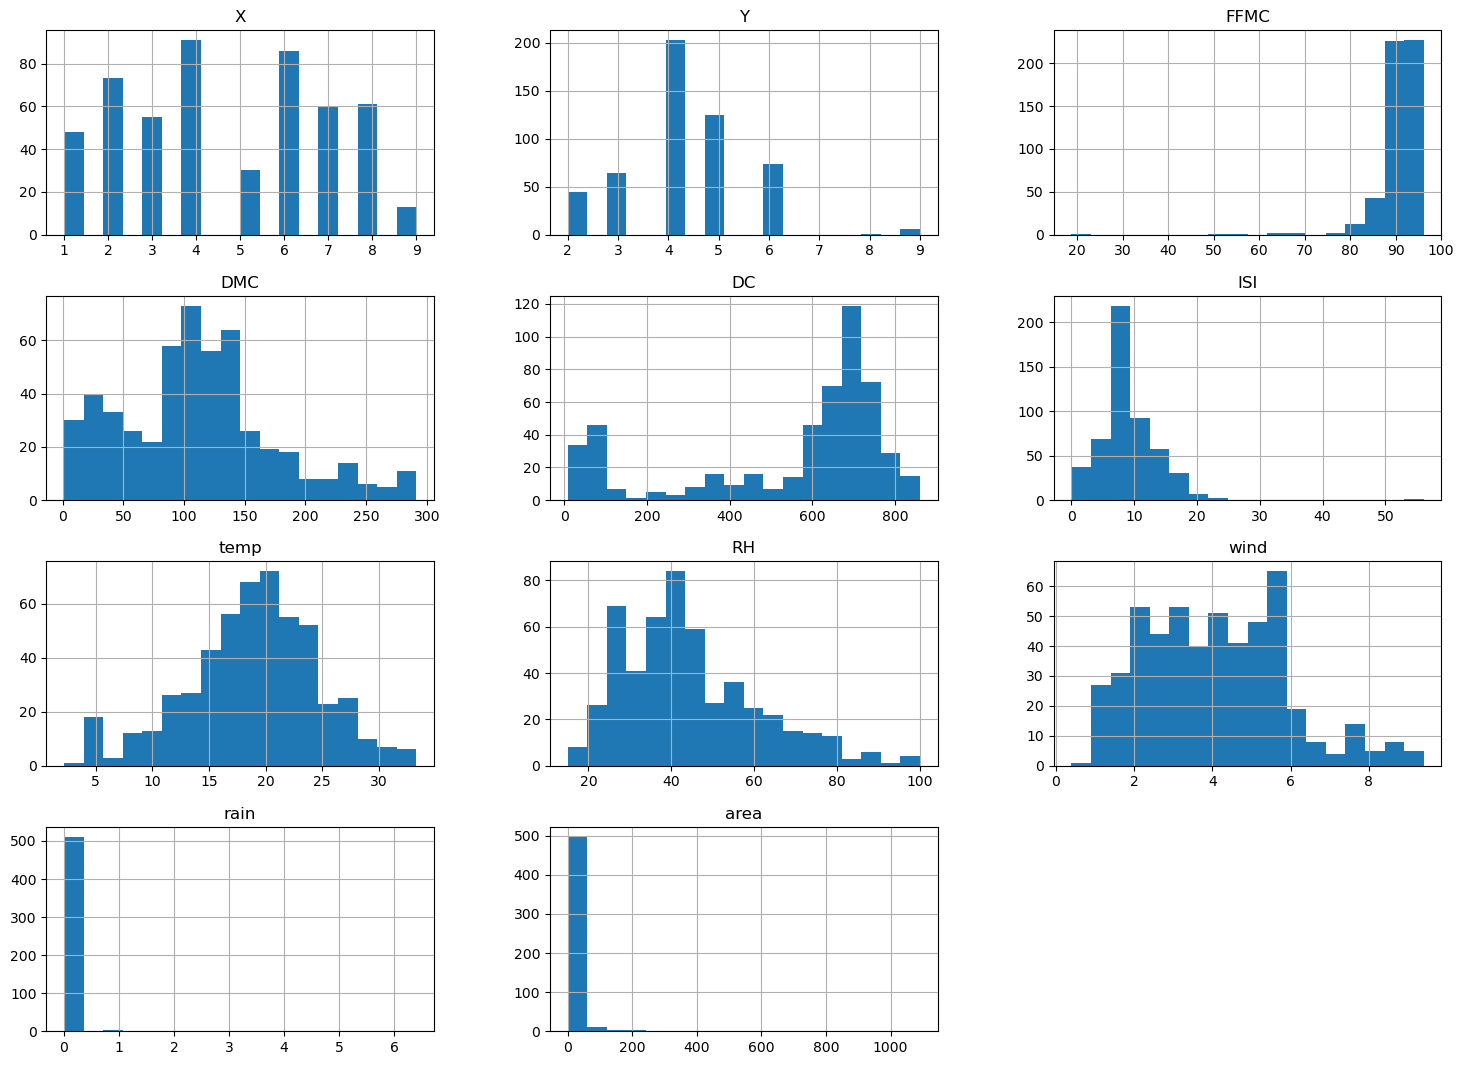

In [53]:
plt1=plt.figure(figsize=(18,13))
a1=plt1.gca()
clf.hist(ax=a1, bins=18)

In [56]:
t1='area'
df1=clf.drop(columns=t1)
cat_col=df1.select_dtypes(include='object').columns.tolist()

cat_col

['month', 'day']

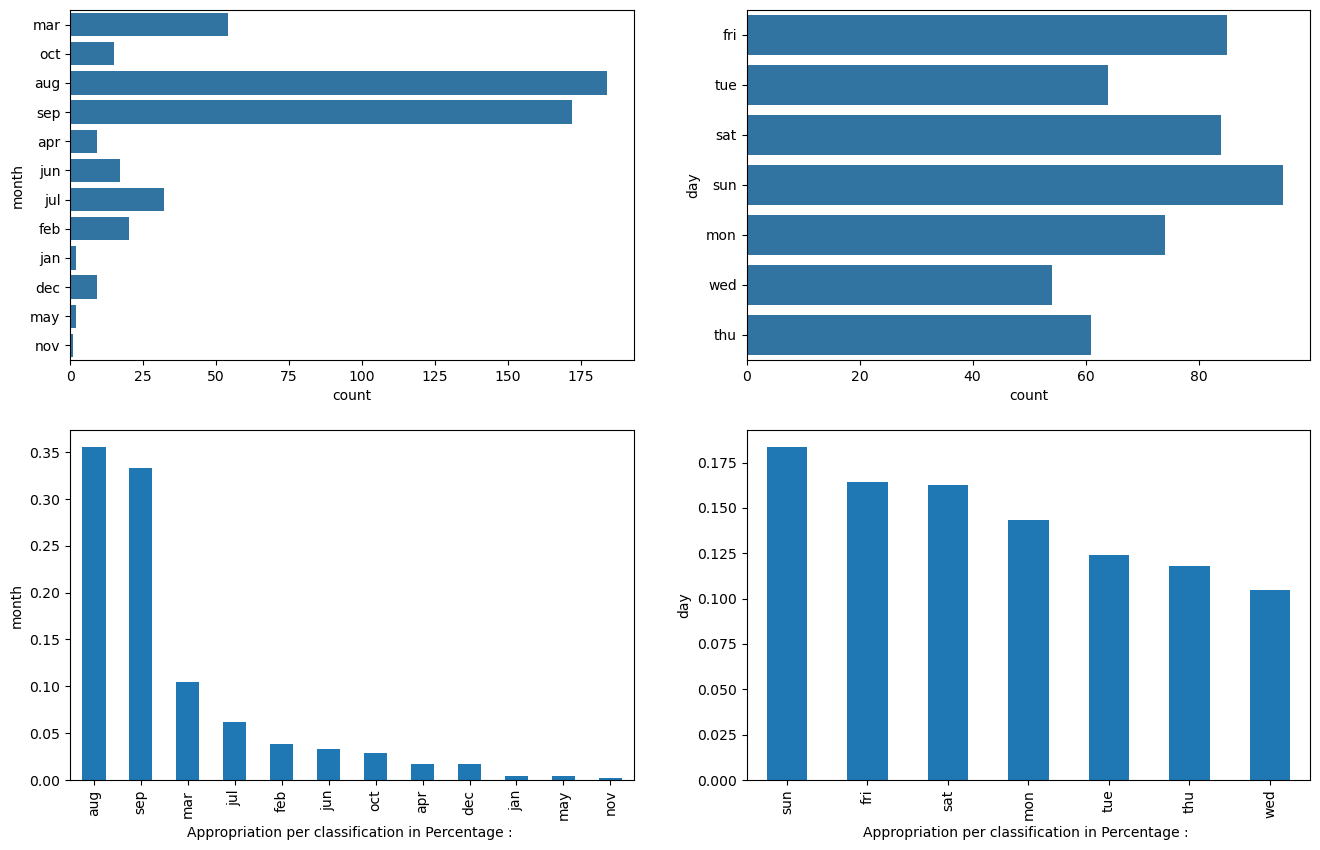

In [57]:
plt.figure(figsize=(16,10))
for i, col in enumerate(cat_col,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1, y=col)
    plt.subplot(2,2,i+2)
    clf[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel("Appropriation per classification in Percentage : ")
plt.show()

In [58]:
clf['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [59]:
clf['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

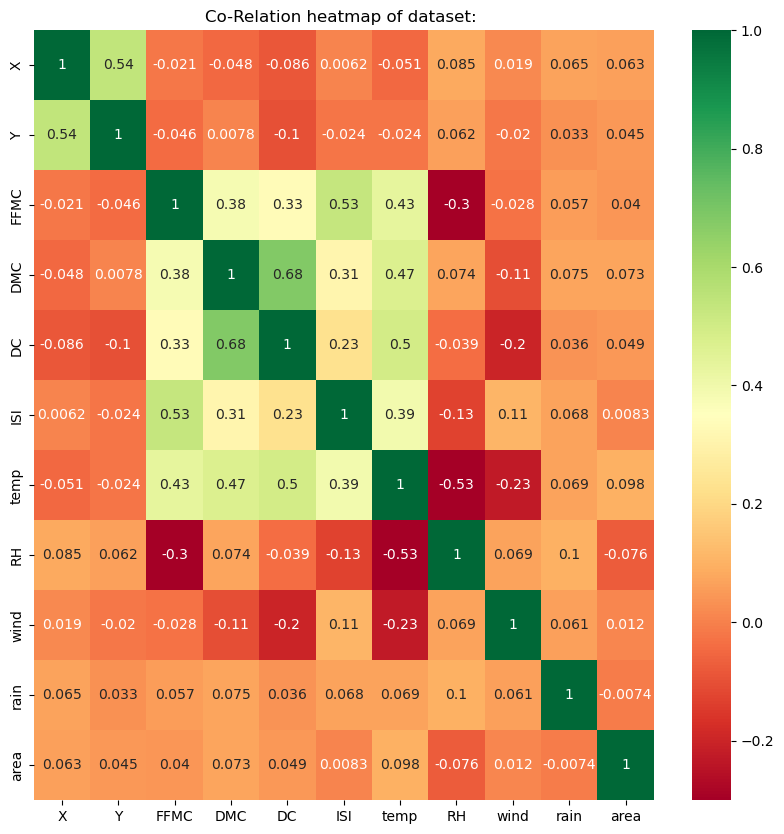

In [60]:
cor1 = clf.select_dtypes(include='number').corr()

plt.figure(figsize=(10,10))
sns.heatmap(cor1, annot=True, cmap='RdYlGn', robust=True)
plt.title("Co-Relation heatmap of dataset: ")
plt.show()

In [75]:
clf.replace(('mon','tue','wed','thu','fri','sat','sun'),
            (1,2,3,4,5,6,7), inplace=True)
clf.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'), 
            (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)

pd.set_option('future.no_silent_downcasting', True)
clf.infer_objects(copy=False)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [79]:
def prediction_training(clf):
    clf=clf.copy()

    #Split forest fire into i and j
    i=clf['month']
    j=clf.drop('month', axis=1)

    #Train Test Split
    i_train, i_test, j_train, j_test = train_test_split(j,i, train_size=0.9, shuffle=True, random_state=1)

    #Scale j
    scaler = StandardScaler()
    scaler.fit(i_train)
    i_train = pd.DataFrame(scaler.transform(i_train), index=i_train.index, columns=i_train.columns)
    i_test = pd.DataFrame(scaler.transform(i_test), index=i_test.index, columns=i_test.columns)

    return i_train, i_test, j_train, j_test

In [80]:
i_train, i_test, j_train, j_test = prediction_training(clf)

In [87]:
i_train

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
147,1.423235,-1.085877,-1.104414,-1.067596,-0.546209,0.534071,-1.240533,0.903235,-0.996505,-0.221057,-0.075925,-0.186707
399,1.854940,0.550858,-0.620843,0.478976,-0.924489,-0.953988,1.094796,1.544927,-0.622010,0.288653,-0.075925,-0.203419
289,0.991529,-0.267509,0.829871,0.183563,-0.058719,-0.249328,0.013625,0.920122,-0.871673,-1.240476,-0.075925,-0.203419
385,-1.166997,-0.267509,1.313442,0.183563,1.161590,0.299846,-0.289103,0.345976,0.376642,-1.013939,-0.075925,0.075115
67,-1.166997,-1.904245,0.346299,0.322581,0.158119,0.518562,0.705575,0.126450,-0.684426,0.798363,-0.075925,-0.203419
...,...,...,...,...,...,...,...,...,...,...,...,...
129,-1.166997,0.550858,1.313442,0.357335,-0.971972,0.613206,-0.029622,-0.582789,-0.559594,-1.750186,-0.075925,-0.203419
144,-1.166997,0.550858,-0.620843,0.861275,-0.126777,-0.096625,0.921809,0.835689,-0.746842,0.798363,-0.075925,-0.190015
72,0.128119,-0.267509,0.346299,0.200940,-1.180896,-1.829645,0.013625,-0.549015,-1.183752,1.308072,-0.075925,-0.203419
235,1.423235,1.369226,1.313442,0.148809,0.545896,0.253717,0.359600,0.126450,-0.185100,1.024900,-0.075925,3.216978


In [89]:
j_train

147     9
399     6
289     7
385     8
67      9
       ..
129    10
144     8
72      3
235     8
37     10
Name: month, Length: 465, dtype: int64

In [101]:
#Applying Prediction Models

models = {
    'Random Forest ': RandomForestClassifier(),
    'Gradient Boosting Classifier ': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(i_train, j_train)

In [103]:
# Evaluation
for name, model in models.items():
    accuracy = model.score(i_test, j_test)
    print(f"{accuracy*100:.3f}% : {name}")

92.308% : Random Forest 
90.385% : Gradient Boosting Classifier 
